In [3]:
import yfinance as yf

In [4]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [5]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

In [6]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095
...,...,...,...,...,...
2024-01-25,40075.550781,40254.480469,39545.664062,39933.808594,18491782013
2024-01-26,39936.816406,42209.386719,39825.691406,41816.871094,25598119893
2024-01-27,41815.625000,42195.632812,41431.281250,42120.054688,11422941934


In [2]:
df = data.iloc[-300:]

NameError: name 'data' is not defined

In [5]:
tprice = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4

In [7]:
pvi = data.ta.nvi(cumulative=True, append=False)

AttributeError: 'DataFrame' object has no attribute 'ta'

In [1]:
df

NameError: name 'df' is not defined

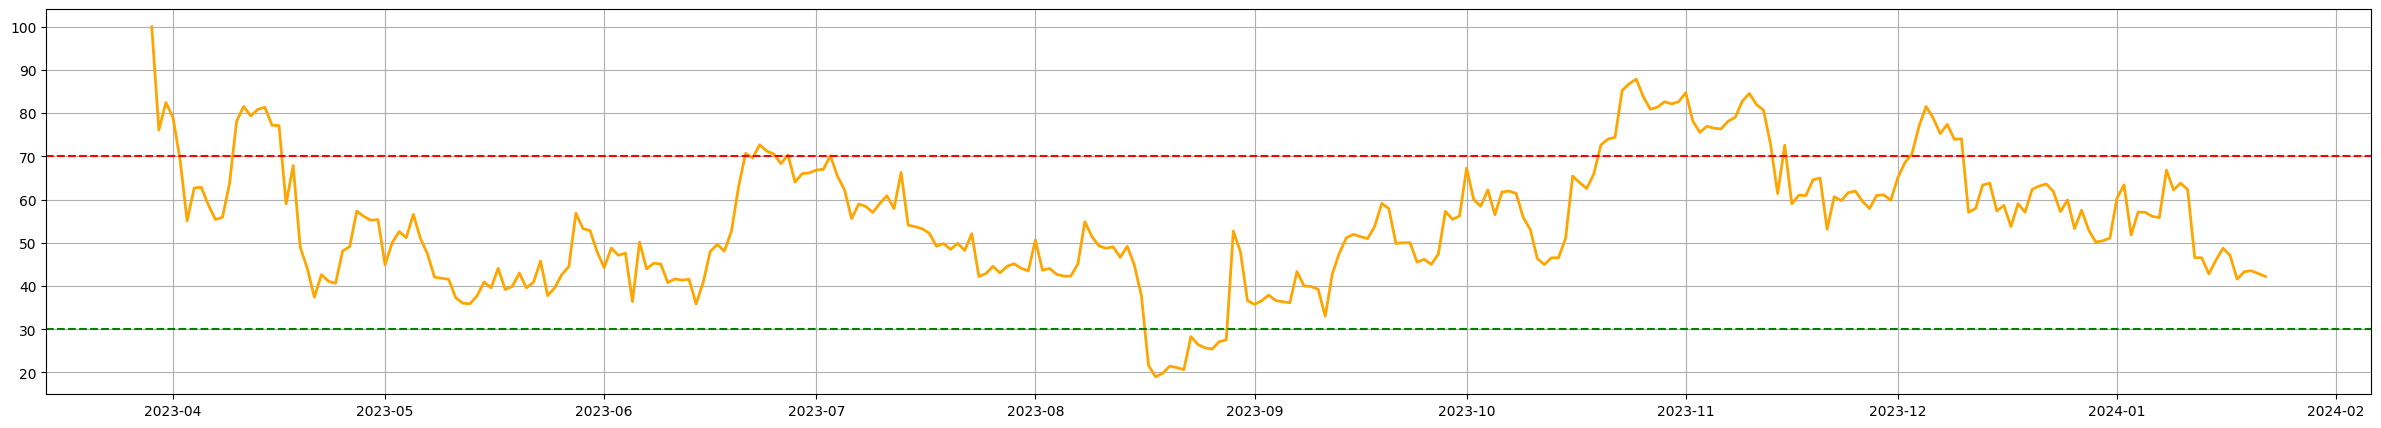

In [5]:
from algo_trader.lib.indicators.rsi import RSI

df = data.iloc[-300:]
sell_threshold = 70
buy_threshold = 30
rsi = RSI(buy_threshold, sell_threshold, 14)
rsi.calculate(df)
rsi.plot()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_5156\186253950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = rsi.calculate(df)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_5156\186253950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buy_signal'] = rsi.calc_buy_signals()
C:\Users\Pablo\AppData\Local\Temp\ipykernel_5156\186253950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

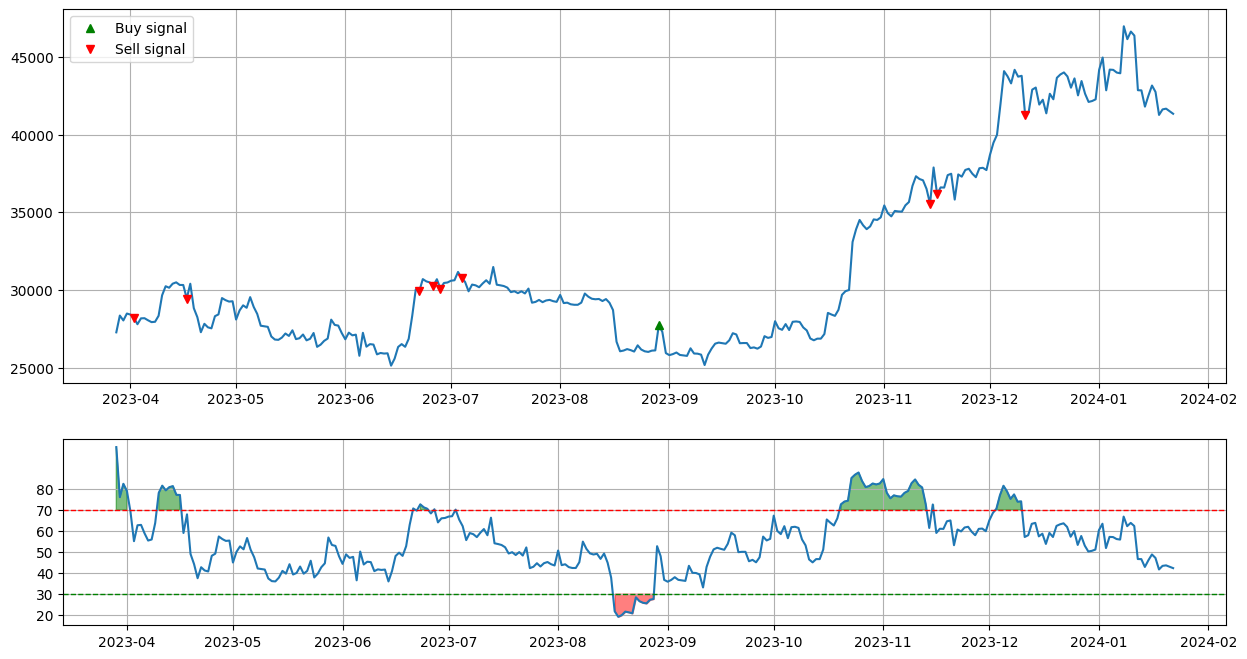

In [6]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios' : [2,1]})

df['rsi'] = rsi.calculate(df)
df['buy_signal'] = rsi.calc_buy_signals()
df['sell_signal'] = rsi.calc_sell_signals()
buySignals = df[df['buy_signal'] == True]
sellSignals = df[df['sell_signal'] == True]

ax[0].plot(df.index, df.Close)
ax[0].plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax[0].plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(df.index, df.rsi)
ax[1].set_yticks(range(10,90,10))
ax[1].axhline(buy_threshold, linestyle='--', linewidth=1, color='green')
ax[1].axhline(sell_threshold, linestyle='--', linewidth=1, color='red')
ax[1].fill_between(df.index, df.rsi, sell_threshold, where=df.rsi>sell_threshold, alpha=0.5, color='green')
ax[1].fill_between(df.index, df.rsi, buy_threshold, where=df.rsi<buy_threshold, alpha=0.5, color='red')
ax[1].grid()

In [7]:
new_record = data.iloc[-1:]
rsi.predict_signal(new_record)

[RSI] Current value: 42.23013170757725
[RSI] Sell Threshold: 70
[RSI] Buy Threshold: 30
[RSI] Signal: Action.HOLD


<Action.HOLD: 'hold'>